**Exercise 12.2**

Exercise 12.1: The data from Table 12.1 is contained in the file HubbleData.txt. See the Appendix. Write a code that will read this data and reproduce the graph in Fig. 12.1.

Extend your code from Exercise 12.1 to determine the Hubble constant H0 using the least squares method. Plot the best fit line v = H0 * d and the data points on the same graph.

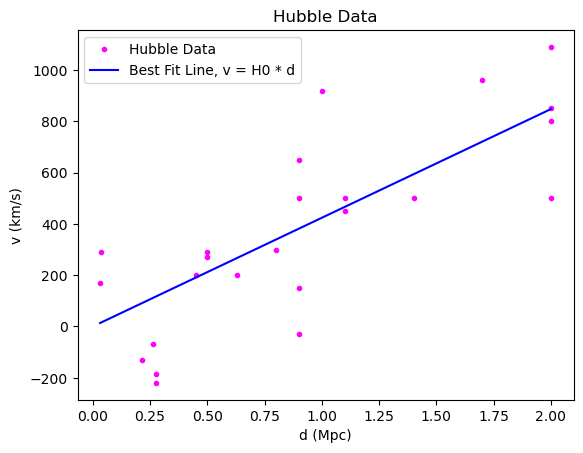

In [15]:
import numpy as np 
import matplotlib.pyplot as plt

# Plotting from Exercise 12.1
d = np.loadtxt("HubbleData.txt", usecols=(0,))
v = np.loadtxt("HubbleData.txt", usecols=(1,))

plt.close() 
fig, (ax) = plt.subplots(1, 1)
ax.plot(d, v, ".", color="magenta", label="Hubble Data")

plt.xlabel("d (Mpc)")
plt.ylabel("v (km/s)")
plt.title("Hubble Data")

# Least Squares method for best fit line
numerator = 0
for i in range(len(d)): 
    numerator += d[i] * v[i]
denominator = 0
for i in range(len(d)): 
    denominator += d[i] ** 2

H0 = numerator/denominator

# Plotting best fit line, v = H0d
f = H0 * d
ax.plot(d, f, color="blue", label="Best Fit Line, v = H0 * d")
ax.legend() 
plt.show()

**Exercise 12.3b**

Import the data file LineData.txt (see the Appendix). Apply the least squares method to fit the data to a straight line, using the formulas for the slope a and y–intercept b from the previous exercise. Make a plot that shows the data points and the best–fit line. 

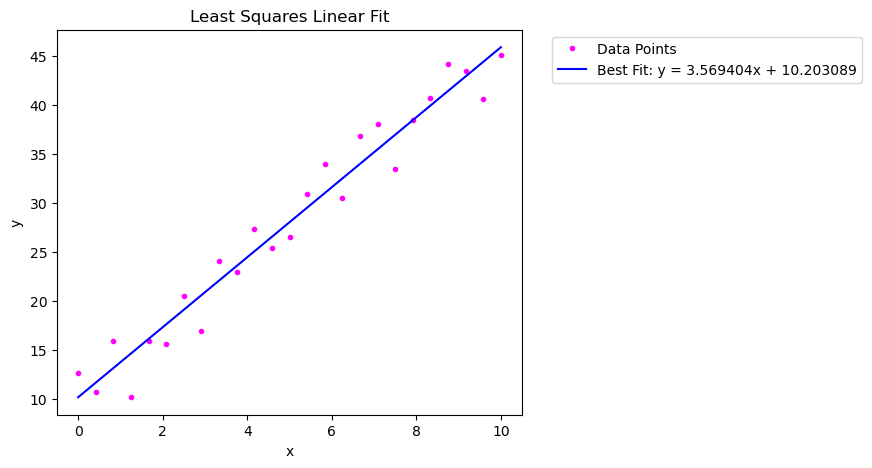

In [28]:
import numpy as np 
import matplotlib.pyplot as plt

# Loading data
x = np.loadtxt("LineData.txt", usecols=(0,))
y = np.loadtxt("LineData.txt", usecols=(1,))

# Sums
N = len(x)
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

# Finding a and b
a = (N*Sxy - Sx*Sy) / (N*Sxx - Sx**2) # Comes from solving the 12.7 System of Equations
b = (Sy - a*Sx) / N

plt.close()
fig, (ax) = plt.subplots(figsize=(6,5)) 

ax.plot(x, y, ".", color="magenta", label="Data Points")
ax.plot(x, a*x + b, color="blue", label=f"Best Fit: y = {a:2f}x + {b:2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Squares Linear Fit")
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1)) # I got the resizing code from my research data analysis script
plt.show()

**Exercise 12.4a**

Write a code that will import the data file SineData.txt (see the Appendix) and carry out a least–squares fit to a function of the form (12.8). Plot a graph showing the data points, as well as the best fit curve. What values did you get for the amplitude, frequency and phase?

Amplitude = 2.6171611811485134

Frequency = 1.337773357618047

Phase = 0.8274524666668781

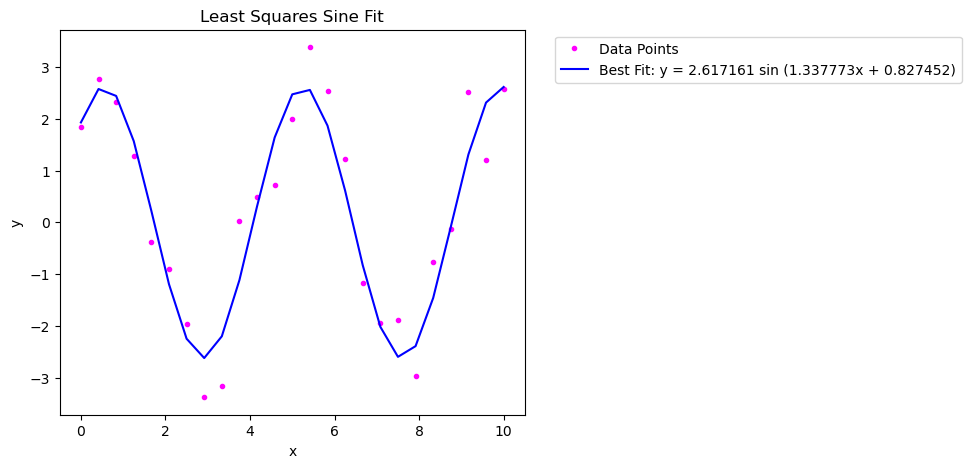

Amplitude = 2.6171611811485134
Frequency = 1.337773357618047
Phase = 0.8274524666668781


In [33]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as so

# Loading Data
x = np.loadtxt("SineData.txt", usecols=(0,))
y = np.loadtxt("SineData.txt", usecols=(1,))


def func(x, a, b, c): 
    return a * np.sin(b*x + c)

# params returns the least-square values of a, b, and c
# square root of each diagonal element of cov provides an estimate of 
# the standard error in the corresponding parameter value
# For example, the parameter a is contained in params[0] and its standard error is sqrt(cov[0,0])
params, cov = so.curve_fit(func, x, y)
a, b, c = params

plt.close()
fig, (ax) = plt.subplots(figsize=(6,5)) 
ax.plot(x, y, ".", color="magenta", label="Data Points")
ax.plot(x, func(x, a, b, c), color="blue", label=f"Best Fit: y = {a:2f} sin ({b:2f}x + {c:2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Squares Sine Fit")
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1)) # I got the resizing code from my research data analysis script
plt.show()

# Printing amplitude (a), frequency (b), and phase (c)
print("Amplitude =", a)
print("Frequency =", b)
print("Phase =", c)

**Exercise 12.4b**

Write a code to import the data file PolyData.txt (see the Appendix). Carry out a least–squares fit to each of the three polynomials

    f(x) = cx + d
    
    f(x) = bx^2 + cx + d 
    
    f(x)= ax^3 +bx^2 +cx + d

Have your code plot the data and each of the three best–fit curves on the same graph.

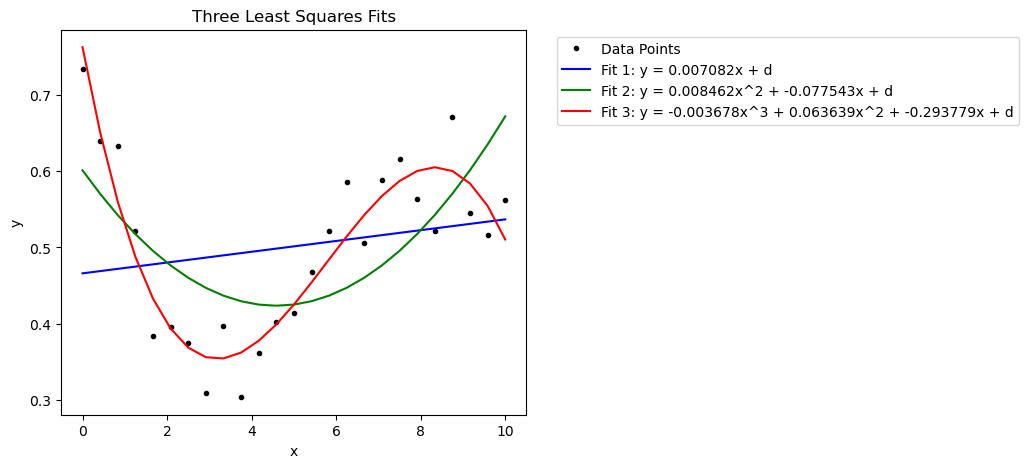

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as so

# Loading Data
x = np.loadtxt("PolyData.txt", usecols=(0,))
y = np.loadtxt("PolyData.txt", usecols=(1,))


def func1(x, c, d): 
    return c*x + d

def func2(x, b, c, d): 
    return b*x**2 + c*x + d

def func3(x, a, b, c, d): 
    return a*x**3 + b*x**2 + c*x + d

# Plot raw data
plt.close()
fig, (ax) = plt.subplots(figsize=(6,5)) 
ax.plot(x, y, ".", color="black", label="Data Points")

# First function
params, cov = so.curve_fit(func1, x, y)
c, d = params
ax.plot(x, func1(x, c, d), color="blue", label=f"Fit 1: y = {c:2f}x + d")

# Second function
params, cov = so.curve_fit(func2, x, y)
b, c, d = params
ax.plot(x, func2(x, b, c, d), color="green", label=f"Fit 2: y = {b:2f}x^2 + {c:2f}x + d")

# Third function
params, cov = so.curve_fit(func3, x, y)
a, b, c, d = params
ax.plot(x, func3(x, a, b, c, d), color="red", label=f"Fit 3: y = {a:2f}x^3 + {b:2f}x^2 + {c:2f}x + d")

# Final Plotting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Three Least Squares Fits")
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1)) # I got the resizing code from my research data analysis script
plt.show()

**Exercise 12.5**

The data from Table 12.2 are contained in the file InterpData.txt. Write a code to define the function y(x) that linearly interpolates this data. Plot the function along with the data points. Use your function to approximate y(2.0) and y(6.5). (Note: The function y(x) is piecewise continuous, defined by Eq. (12.10) in the intervals between each adjacent pair of knots.)

In [ ]:
# Didn't finish in time

**Exercise 12.7a**

Use CubicSpline() to compute the cubic spline approximation to the data given in Table 12.2 and InterpData.txt. Plot the cubic spline interpolator along with the data.

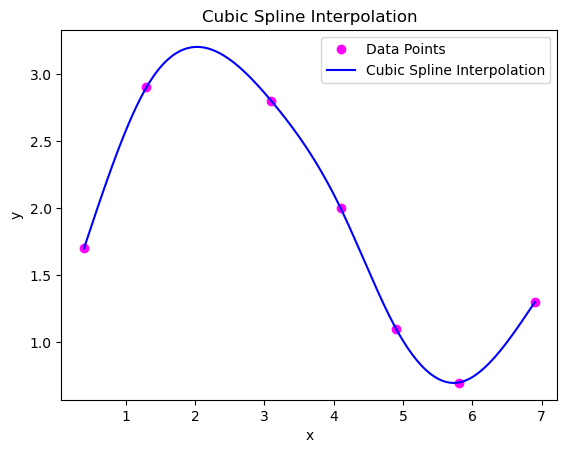

In [40]:
import numpy as np
import scipy.interpolate as si
# import matplotlib.pyplot as plt

# Loading Data
x = np.loadtxt("InterpData.txt", usecols=(0,))
y = np.loadtxt("InterpData.txt", usecols=(1,))

# Plotting cubic spline
fun = si.CubicSpline(x, y, bc_type="natural", extrapolate=False)
x_plot = np.linspace(x[0], x[-1], 200)
y_plot = fun(x_plot)

# Plotting
plt.close()
plt.plot(x, y, 'o', color='magenta', label='Data Points')
plt.plot(x_plot, y_plot, '-', color='blue', label='Cubic Spline Interpolation')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.show()